#Tesla Stock Price Prediction using SimpleRNN and LSTM



## 1. Problem Understanding

The objective of this project is to predict Tesla (TSLA) stock prices using historical time-series data. We model temporal dependencies using deep learning models, specifically SimpleRNN and LSTM, and compare their performance.

**Target variable:** Adj Close (Adjusted Closing Price)


#### Why RNN/LSTM?

1.  Stock prices are sequential in nature
2.  RNNs can model temporal dependencies
3.  LSTMs handle long-term dependencies better than vanilla RNNs


##2. Data Preprocessing

2.1 Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/TSLA.csv')

# Basic exploration
print(df.head())
print(df.info())

         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB
None


####2.2 Feature Selection

1. Convert Date column to datetime.
2. Set Date as index.
3. Use Adj Close as the prediction target.

In [2]:
# Convert Date and set index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select target feature
# As per project requirement, analysis is performed on Closing Price
# We use 'Adj Close' since it reflects true closing price after adjustments
data = df[['Adj Close']]

####2.3 Data Visualization

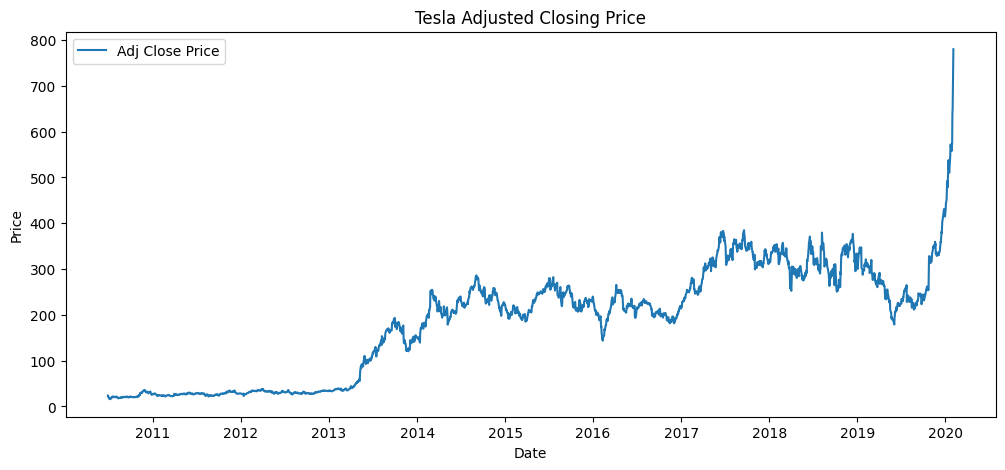

In [3]:
plt.figure(figsize=(12,5))
plt.plot(data, label='Adj Close Price')
plt.title('Tesla Adjusted Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### 2.4 Scaling the Data
  Neural networks converge faster with normalized data.

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

#### 2.5 Creating Time-Series Sequences

We use the past 60 days to predict the next day's price.

In [5]:
def create_sequences(data, window_size=60):
  X, y = [], []
  for i in range(window_size, len(data)):
    X.append(data[i-window_size:i, 0])
    y.append(data[i, 0])
  return np.array(X), np.array(y)


window_size = 60
X, y = create_sequences(scaled_data, window_size)


# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


# Reshape for RNN/LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## 3. Model Development

#### 3.1 SimpleRNN Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

simple_rnn_model = Sequential([
SimpleRNN(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
Dropout(0.2),
Dense(1)
])

simple_rnn_model.compile(optimizer='adam', loss='mean_squared_error')
simple_rnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

#### 3.2 LSTM Model

In [7]:
lstm_model = Sequential([
LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
Dropout(0.2),
Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

#### 3.3 Model Training

In [8]:
callbacks = [
  EarlyStopping(monitor='val_loss', patience=5),
  ModelCheckpoint('best_model.h5', save_best_only=True)
]


history_rnn = simple_rnn_model.fit(
  X_train, y_train,
  validation_split=0.1,
  epochs=30,
  batch_size=32,
  callbacks=callbacks
)


history_lstm = lstm_model.fit(
  X_train, y_train,
  validation_split=0.1,
  epochs=30,
  batch_size=32,
  callbacks=callbacks
)

Epoch 1/30
48/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0583

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0540 - val_loss: 0.0165
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0031

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 3/30
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0020

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017 - val_loss: 8.9028e-04
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 7/30
48/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.2032e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.1871e-04 - val_loss: 4.4538e-04
Epoch 8/30
48/53 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.8665e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.8976e-04 - val_loss: 3.7156e-04
Epoch 9/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.4402e-04 - val_loss: 4.1165e-04
Epoch 10/30
49/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.5133e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.5172e-04 - val_loss: 2.7412e-04
Epoch 11/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.2168e-04 - val_loss: 3.7903e-04
Epoch 12/30
48/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.4038e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.4076e-04 - val_loss: 2.6449e-04
Epoch 13/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.6590e-04 - val_loss: 0.0012
Epoch 14/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.2069e-04 - val_loss: 4.9502e-04
Epoch 15/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.8385e-04 - val_loss: 9.2037e-04
Epoch 16/30
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.3627e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.3292e-04 - val_loss: 2.4064e-04
Epoch 17/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.2668e-04 - val_loss: 3.7272e-04
Epoch 18/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.2506e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.2514e-04 - val_loss: 2.2360e-04
Epoch 19/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.9910e-04 - val_loss: 2.7413e-04
Epoch 20/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.9525e-04 - val_loss: 2.2487e-04
Epoch 21/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.0492e-04 - val_loss: 3.6021e-04
Epoch 22/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.7474e-04 - val_loss: 3.1083e-04
Epoch 23/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.7153e-04 - val_loss: 2.3346e-04
Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0167 - val_loss: 0.0016
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.7886e-04 - val_loss: 4.3293e-04
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.9568e-04 - val_loss: 7.6019e-04
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.8959e-04 - val_loss: 4.6327e-04
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.5146e-04 - val_loss: 4.

## 4. Model Evaluation & Prediction

#### 4.1 Predictions

In [9]:
# Predict
rnn_preds = simple_rnn_model.predict(X_test)
lstm_preds = lstm_model.predict(X_test)


# Inverse scaling
rnn_preds = scaler.inverse_transform(rnn_preds)
lstm_preds = scaler.inverse_transform(lstm_preds)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


#### 4.2 Performance Metrics

In [10]:
from sklearn.metrics import mean_squared_error


rnn_mse = mean_squared_error(y_test_inv, rnn_preds)
lstm_mse = mean_squared_error(y_test_inv, lstm_preds)

print('SimpleRNN MSE:', rnn_mse)
print('LSTM MSE:', lstm_mse)

SimpleRNN MSE: 372.0794513709526
LSTM MSE: 495.36843366670826


#### 4.3 Visualization

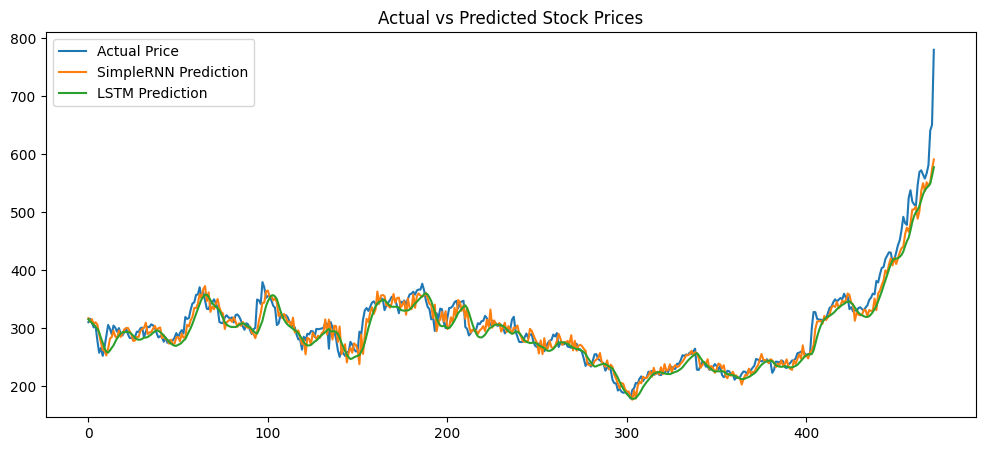

In [11]:
plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(rnn_preds, label='SimpleRNN Prediction')
plt.plot(lstm_preds, label='LSTM Prediction')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.show()

## 5. Limitations


* Stock prices are influenced by external events (news, earnings, macroeconomics)
* Models rely solely on historical prices
* Sensitive to sudden market shocks



## 6. Possible Improvements

* Add features: Volume, Technical Indicators (RSI, MACD)
* Use sentiment analysis from news/Twitter
* Try advanced models: GRU, Bi-LSTM, Transformers
* Hyperparameter tuning (units, learning rate, window size)



## Conclusion

This project demonstrates how deep learning time-series models can be applied to stock price prediction. While LSTM outperforms SimpleRNN, real-world trading systems should integrate additional financial signals and risk management strategies.